In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#### Анализ файла googleplaystore.csv с Kaggle

In [2]:
%time data = pd.read_csv('googleplaystore.csv', dtype='unicode')
data.info()

CPU times: user 28 ms, sys: 128 ms, total: 156 ms
Wall time: 227 ms
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null object
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: object(13)
memory usage: 550.6+ KB


In [3]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

###### Выполняем очиcтку данных
Данные взял с Google Play

In [4]:
eggs= []
idx = data.loc[data['Installs'] ==  'Free', :].index[0]
for i in data.iloc[idx, :]:
    eggs.append(i)
eggs.insert(1, 'LIFESTYLE')
eggs.pop()
eggs[9] = 'Lifestyle'
data.iloc[idx, :] = eggs

In [5]:
idx = data.loc[data['Type'].isnull(), :].index[0]
eggs = ['Command & Conquer: Rivals', 'FAMILY', '4.0', '111515', '75M', '1,000,000+', 'Free', '0', 'Everyone 10+', 'Strategy', 'April 23, 2019', '1.5.0', '4.1 and up']
data.iloc[idx, :] = eggs

Заменил NaN на наиболее частые значения в данных.

In [6]:
data['Android Ver'].replace(np.nan, '4.1 and up', inplace=True)
data['Current Ver'].replace(np.nan, 'Varies with device', inplace=True)

Преобразуем в числовой тип.

In [7]:
data['Rating'] = data['Rating'].astype(float)
data['Reviews'] = data['Reviews'].astype(int)

Заполняем значения NaN средним рейтингом по каждой из категорий.

In [8]:
for ctg in data['Category'].unique():
    ctg_mean = round(data.loc[data['Category'] == ctg, 'Rating'].mean(), 1)
    data.loc[data['Rating'].isnull() & (data['Category'] == ctg), 'Rating'] = ctg_mean

Примечание:
Комманды указанные ниже почему-то данные не поменяли:  
data.loc[data['Category'] == 'BEAUTY', 'Rating'].replace(np.nan, ctg_mean, nplace=True)  
data.loc[data['Category'] == 'BEAUTY', 'Rating'].fillna(value = ctg_mean, inplace=True)  

Просьба объяснить почему.

In [9]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            10841 non-null float64
Reviews           10841 non-null int32
Size              10841 non-null object
Installs          10841 non-null object
Type              10841 non-null object
Price             10841 non-null object
Content Rating    10841 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10841 non-null object
Android Ver       10841 non-null object
dtypes: float64(1), int32(1), object(11)
memory usage: 592.9+ KB


Количество инсталляций переводим в тип int.

In [11]:
data['Installs'] = data['Installs'].str.replace('+', '')
data['Installs'] = data['Installs'].str.replace(',', '')
data['Installs'] = data['Installs'].astype(int)

Стоимость приложения переводим в тип float.

In [12]:
data['Price'] = data['Price'].str.replace('$', '')
data['Price'] = data['Price'].astype(float)

In [13]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


###### Визуализируем имеющиеся данные.

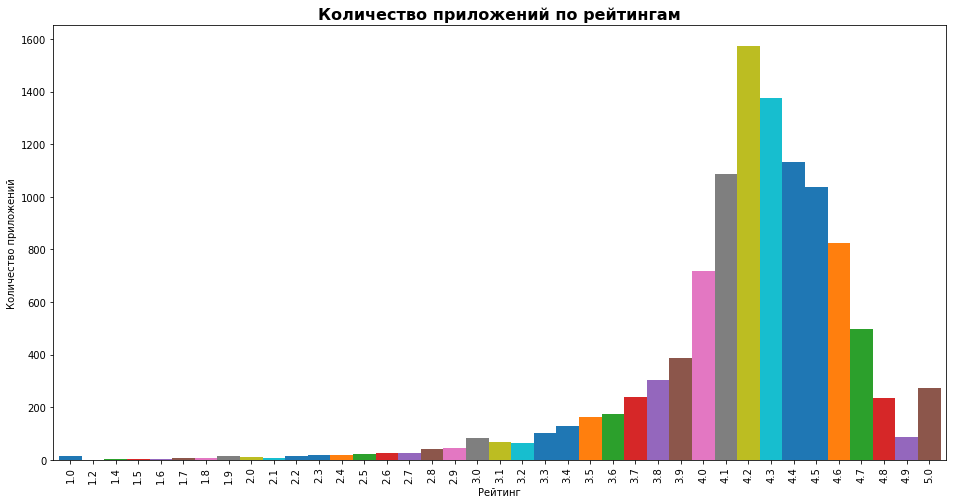

In [14]:
data['Rating'].value_counts().sort_index().plot(kind='bar', width=1, figsize=(16, 8))
plt.title('Количество приложений по рейтингам', fontsize = 16, fontweight='bold')
plt.xlabel('Рейтинг')
plt.ylabel('Количество приложений')
plt.show()
# Очень похоже, что Рейтинг подчинен нормальному закону распределения.

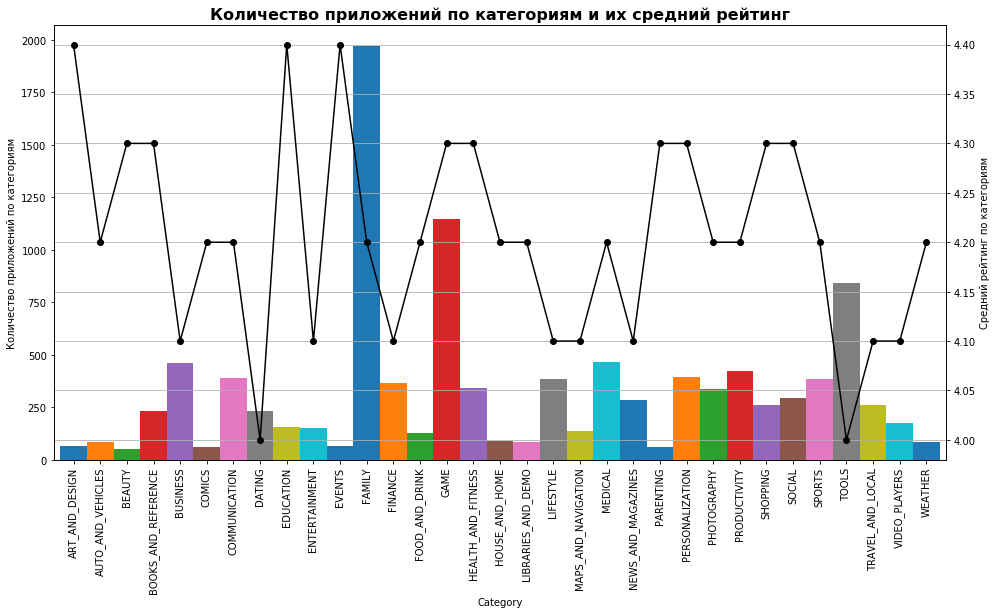

In [15]:
ax = data['Category'].value_counts().sort_index().plot(kind='bar', width=1, figsize=(16, 8))
plt.ylabel('Количество приложений по категориям')
data.groupby(['Category'])['Rating'].mean().round(1).plot(secondary_y=True, color='black', marker='o', xlim=ax.get_xlim())
plt.ylabel('Средний рейтинг по категориям')
plt.title('Количество приложений по категориям и их средний рейтинг', fontsize = 16, fontweight='bold')
ax.set_xticklabels(sorted(data['Category'].unique()), rotation=90)
plt.grid()
plt.show()

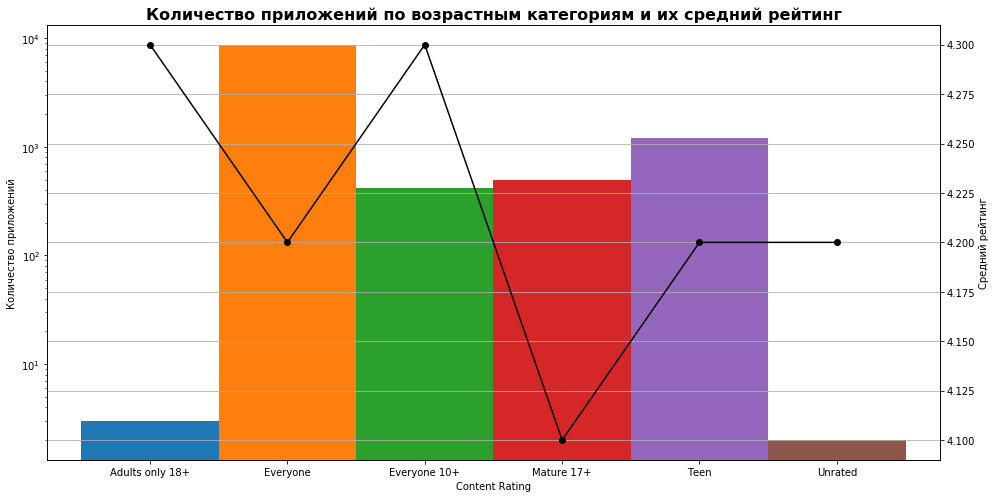

In [16]:
ax = data['Content Rating'].value_counts().sort_index().plot(kind='bar', width=1, figsize=(16, 8))
plt.ylabel('Количество приложений')
plt.yscale('log')
data.groupby(['Content Rating'])['Rating'].mean().round(1).plot(secondary_y=True, color='black', marker='o', xlim=ax.get_xlim())
plt.ylabel('Средний рейтинг')
plt.title('Количество приложений по возрастным категориям и их средний рейтинг', fontsize = 16, fontweight='bold')
plt.grid()
plt.show()

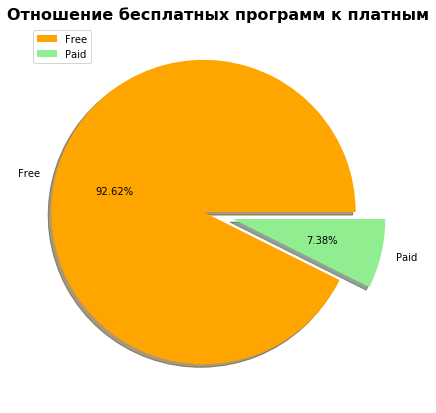

In [17]:
data['Type'].value_counts().sort_index().plot(kind='pie', colors=['orange', 'lightgreen'], explode = [0.1, 0.1], shadow = True, autopct = '%.2f%%', figsize=(7, 7))
plt.legend(loc='upper left')
plt.axis('off')
plt.title('Отношение бесплатных программ к платным', fontsize = 16, fontweight='bold')
plt.show()

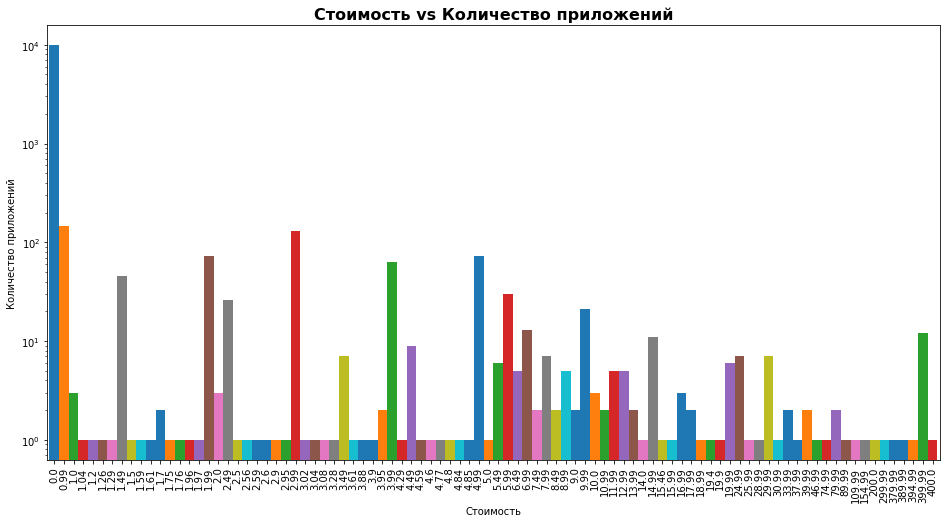

In [18]:
data['Price'].value_counts().sort_index().plot(kind='bar', width=1, figsize=(16, 8))
plt.yscale('log')
plt.title('Стоимость vs Количество приложений', fontsize = 16, fontweight='bold')
plt.xlabel('Стоимость')
plt.ylabel('Количество приложений')
plt.show()

In [19]:
print('Средний рейтинг платных приложений', round(data.loc[data['Price'] !=  0]['Rating'].mean(), 2))
print('Средний рейтинг бесплатных приложений', round(data.loc[data['Price'] ==  0]['Rating'].mean(), 2))

Средний рейтинг платных приложений 4.25
Средний рейтинг бесплатных приложений 4.18


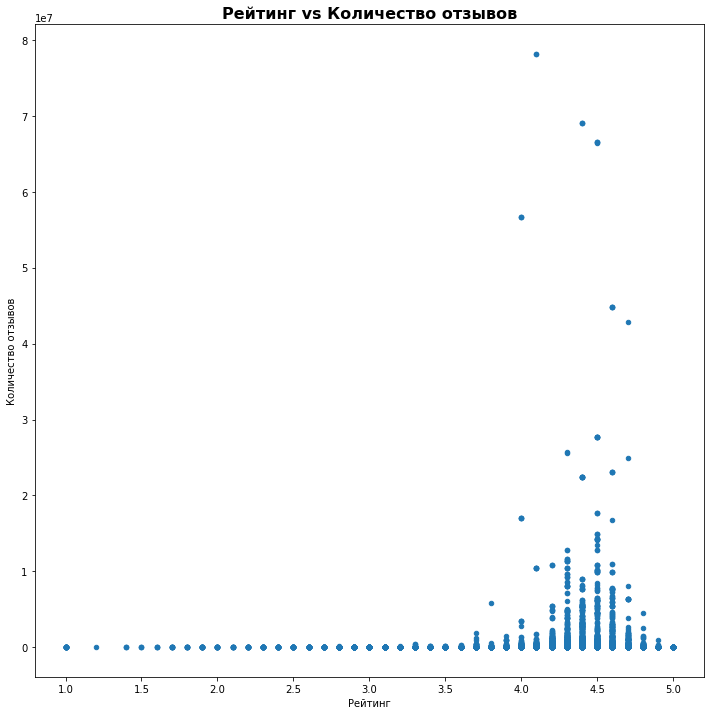

In [20]:
data.plot(x='Rating', y='Reviews', kind='scatter', figsize=(12, 12))
plt.title('Рейтинг vs Количество отзывов', fontsize = 16, fontweight='bold')
plt.xlabel('Рейтинг')
plt.ylabel('Количество отзывов')
plt.show()

###### С помощью коэффициента корреляции Пирсона попробуем определить насколько сильно связанны между собой рейтинг и количество отзывов.

In [21]:
corr_coef = np.corrcoef(data['Rating'], data['Reviews'])[0][1]
corr_coef

0.06843669661041538

Коэффициента Пирсона равен 0.068 из чего можно сделать вывод, что взаимосвязь между рейтингом и количеством отзывов отсутствует.

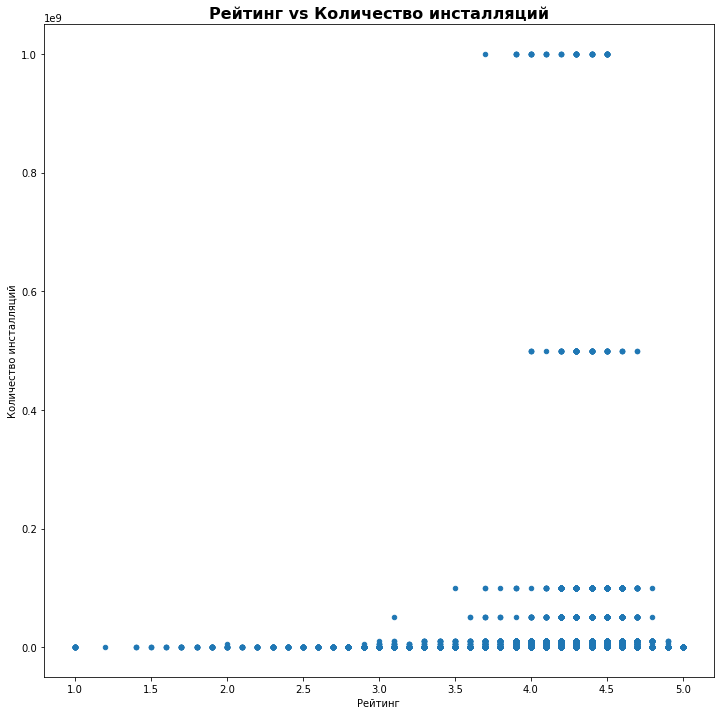

In [22]:
data.plot(x='Rating', y='Installs', kind='scatter', figsize=(12, 12))
plt.title('Рейтинг vs Количество инсталляций', fontsize = 16, fontweight='bold')
plt.xlabel('Рейтинг')
plt.ylabel('Количество инсталляций')
plt.show()

###### Аналогично с помощью коэффициента корреляции Пирсона попробуем определить насколько сильно связанны между собой рейтинг и количество инсталляций.

In [23]:
corr_coef = np.corrcoef(data['Rating'], data['Installs'])[0][1]
corr_coef

0.05183516641736964

Коэффициента Пирсона равен 0.051 из чего можно сделать вывод, что взаимосвязь между рейтингом и количеством инсталляций отсутствует.

In [24]:
#data['Price'].value_counts().sort_values()
#data.groupby(['Content Rating'])['Rating'].mean().round(1)
#data.groupby(['Category'])['Rating'].mean().round(1)